<a href="https://colab.research.google.com/github/JaynthReddy91/MachineLearning/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def sigmoid(x):
  # Our activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    # Weight inputs, add bias, then use the activation function
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)

weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 4
n = Neuron(weights, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.feedforward(x))    # 0.9990889488055994


0.9990889488055994


In [ ]:
import numpy as np

import numpy as np

# --- Activation Function ---
def sigmoid(x):
    """Sigmoid activation function: f(x) = 1 / (1 + e^(-x))"""
    return 1 / (1 + np.exp(-x))

# --- Neuron Class ---
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        """Compute neuron output using weights, bias, and activation function."""
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)
class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
  Each neuron has the same weights and bias:
    - w = [0, 1]
    - b = 0
  '''
  def __init__(self):
    weights = np.array([0, 1])
    bias = 0

# The Neuron class here is from the previous section
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    # The inputs for o1 are the outputs from h1 and h2
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

    return out_o1

network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)) # 0.7216325609518421


0.7216325609518421


In [ ]:
# Define the XOR inputs and expected outputs
xor_inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

xor_outputs = np.array([0, 1, 1, 0])

print("XOR Inputs:\n", xor_inputs)
print("\nXOR Expected Outputs:\n", xor_outputs)

XOR Inputs:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]

XOR Expected Outputs:
 [0 1 1 0]


In [ ]:
class XORNeuralNetwork:
    '''
    A neural network specifically designed to represent the XOR function
    using predefined weights and biases.
    '''
    def __init__(self):
        # Weights and biases for the hidden layer
        # These values are chosen to make the hidden layer neurons act like
        # gates that help the output layer separate the XOR patterns.
        weights_h1 = np.array([1, 1])
        bias_h1 = -0.5

        weights_h2 = np.array([1, 1])
        bias_h2 = -1.5

        # Weights and bias for the output layer
        # These values combine the hidden layer outputs to produce the XOR result.
        weights_o1 = np.array([1, -1])
        bias_o1 = -0.5


        self.h1 = Neuron(weights_h1, bias_h1)
        self.h2 = Neuron(weights_h2, bias_h2)
        self.o1 = Neuron(weights_o1, bias_o1)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1

In [ ]:
# Instantiate the XOR Neural Network
xor_network = XORNeuralNetwork()

# Test the network with XOR inputs
print("XOR Network Predictions:")
for i in range(len(xor_inputs)):
    input_data = xor_inputs[i]
    prediction = xor_network.feedforward(input_data)
    print(f"Input: {input_data}, Prediction: {prediction:.4f}")

# Note: The predictions will be probabilities between 0 and 1 due to the sigmoid activation.
# A prediction close to 0 represents an output of 0, and a prediction close to 1 represents an output of 1.

XOR Network Predictions:
Input: [0 0], Prediction: 0.4244
Input: [0 1], Prediction: 0.4366
Input: [1 0], Prediction: 0.4366
Input: [1 1], Prediction: 0.4244


In [ ]:
#MNIST dataet
import sklearn.datasets as skl_data
data, labels = skl_data.fetch_openml('mnist_784', version=1, return_X_y=True)
print(data.shape)
data.head()
data = data / 255.0
data

labels


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=.10, random_state=42, stratify=labels)
print(X_train.shape)
print(X_test.shape)


import sklearn.neural_network as skl_nn
mlp = skl_nn.MLPClassifier(hidden_layer_sizes=(50), max_iter=60, verbose=1, random_state=1)
mlp.fit(X_train,y_train)
print("Training set score", mlp.score(X_train, y_train))
print("Testing set score", mlp.score(X_test, y_test))


index = 346
test_digit = X_test.iloc[index].to_numpy().reshape(1,784)
test_digit_prediciton = mlp.predict(test_digit)[0]
print("Predicted value",test_digit_prediciton)
print("Actual value",y_test.iloc[index])


(70000, 784)
(63000, 784)
(7000, 784)
Iteration 1, loss = 0.50240991
Iteration 2, loss = 0.24293823
Iteration 3, loss = 0.19396647
Iteration 4, loss = 0.16213879
Iteration 5, loss = 0.14071148
Iteration 6, loss = 0.12341883
Iteration 7, loss = 0.10922166
Iteration 8, loss = 0.09774355
Iteration 9, loss = 0.08919639
Iteration 10, loss = 0.08139225
Iteration 11, loss = 0.07540877
Iteration 12, loss = 0.06954664
Iteration 13, loss = 0.06361726
Iteration 14, loss = 0.05979103
Iteration 15, loss = 0.05585580
Iteration 16, loss = 0.05202626
Iteration 17, loss = 0.04899432
Iteration 18, loss = 0.04561763
Iteration 19, loss = 0.04281492
Iteration 20, loss = 0.04050308
Iteration 21, loss = 0.03787670
Iteration 22, loss = 0.03558628
Iteration 23, loss = 0.03292704
Iteration 24, loss = 0.03132445
Iteration 25, loss = 0.02988745
Iteration 26, loss = 0.02857582
Iteration 27, loss = 0.02623057
Iteration 28, loss = 0.02454969
Iteration 29, loss = 0.02335991
Iteration 30, loss = 0.02190347
Iteration 3


Training with learning rate: 0.001
Iteration 1, loss = 0.50240991
Iteration 2, loss = 0.24293823
Iteration 3, loss = 0.19396647
Iteration 4, loss = 0.16213879
Iteration 5, loss = 0.14071148
Iteration 6, loss = 0.12341883
Iteration 7, loss = 0.10922166
Iteration 8, loss = 0.09774355
Iteration 9, loss = 0.08919639
Iteration 10, loss = 0.08139225
Iteration 11, loss = 0.07540877
Iteration 12, loss = 0.06954664
Iteration 13, loss = 0.06361726
Iteration 14, loss = 0.05979103
Iteration 15, loss = 0.05585580
Iteration 16, loss = 0.05202626
Iteration 17, loss = 0.04899432
Iteration 18, loss = 0.04561763
Iteration 19, loss = 0.04281492
Iteration 20, loss = 0.04050308
Iteration 21, loss = 0.03787670
Iteration 22, loss = 0.03558628
Iteration 23, loss = 0.03292704
Iteration 24, loss = 0.03132445
Iteration 25, loss = 0.02988745
Iteration 26, loss = 0.02857582
Iteration 27, loss = 0.02623057
Iteration 28, loss = 0.02454969
Iteration 29, loss = 0.02335991
Iteration 30, loss = 0.02190347
Iteration 31,

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.25712698
Iteration 2, loss = 0.13080252
Iteration 3, loss = 0.10312128
Iteration 4, loss = 0.08895354
Iteration 5, loss = 0.07912970
Iteration 6, loss = 0.07332885
Iteration 7, loss = 0.06368210
Iteration 8, loss = 0.06317413
Iteration 9, loss = 0.05794502
Iteration 10, loss = 0.05782994
Iteration 11, loss = 0.05050052
Iteration 12, loss = 0.05017151
Iteration 13, loss = 0.05017109
Iteration 14, loss = 0.04617367
Iteration 15, loss = 0.04304354
Iteration 16, loss = 0.04542039
Iteration 17, loss = 0.04605361
Iteration 18, loss = 0.04929304
Iteration 19, loss = 0.03908394
Iteration 20, loss = 0.03997652
Iteration 21, loss = 0.03884583
Iteration 22, loss = 0.04466203
Iteration 23, loss = 0.03901538
Iteration 24, loss = 0.03294724
Iteration 25, loss = 0.04502684
Iteration 26, loss = 0.03413959
Iteration 27, loss = 0.03260533
Iteration 28, loss = 0.04448821
Iteration 29, loss = 0.03127420
Iteration 30, loss = 0.03227379
Iteration 31, loss = 0.03291078
Iteration 32, los

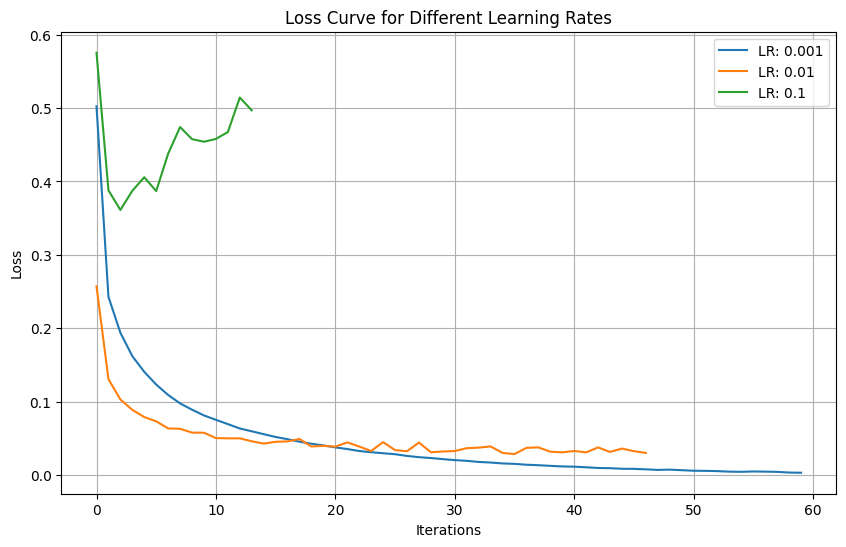

In [4]:
import sklearn.datasets as skl_data

# Load the MNIST dataset
data, labels = skl_data.fetch_openml('mnist_784', version=1, return_X_y=True)
data = data / 255.0 # Normalize the data

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=.10, random_state=42, stratify=labels)

learning_rates = [0.001, 0.01, 0.1]
loss_curves = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    mlp = skl_nn.MLPClassifier(hidden_layer_sizes=(50), max_iter=60, verbose=True, random_state=1, learning_rate_init=lr)
    mlp.fit(X_train, y_train)
    loss_curves[lr] = mlp.loss_curve_

plt.figure(figsize=(10, 6))
for lr, loss_curve in loss_curves.items():
    plt.plot(loss_curve, label=f'LR: {lr}')

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

## Analyze number of neurons and loss

### Subtask:
Train MLP models with varying numbers of neurons in the hidden layer and plot the loss over iterations for each configuration to understand the impact of model complexity.


**Reasoning**:
Train MLP models with varying numbers of neurons and plot the loss curves to analyze the impact of model complexity on loss.




Training with 10 neurons in the hidden layer
Iteration 1, loss = 0.90557728
Iteration 2, loss = 0.37871711
Iteration 3, loss = 0.32131031
Iteration 4, loss = 0.29002031
Iteration 5, loss = 0.27025865
Iteration 6, loss = 0.25806850
Iteration 7, loss = 0.24834860
Iteration 8, loss = 0.24089468
Iteration 9, loss = 0.23488577
Iteration 10, loss = 0.22871950
Iteration 11, loss = 0.22370657
Iteration 12, loss = 0.21975538
Iteration 13, loss = 0.21606146
Iteration 14, loss = 0.21180915
Iteration 15, loss = 0.20932899
Iteration 16, loss = 0.20708488
Iteration 17, loss = 0.20453851
Iteration 18, loss = 0.20164724
Iteration 19, loss = 0.20009875
Iteration 20, loss = 0.19787234
Iteration 21, loss = 0.19657895
Iteration 22, loss = 0.19456358
Iteration 23, loss = 0.19319432
Iteration 24, loss = 0.19142519
Iteration 25, loss = 0.19009420
Iteration 26, loss = 0.18850313
Iteration 27, loss = 0.18712810
Iteration 28, loss = 0.18633903
Iteration 29, loss = 0.18482951
Iteration 30, loss = 0.18357657
Ite

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.50240991
Iteration 2, loss = 0.24293823
Iteration 3, loss = 0.19396647
Iteration 4, loss = 0.16213879
Iteration 5, loss = 0.14071148
Iteration 6, loss = 0.12341883
Iteration 7, loss = 0.10922166
Iteration 8, loss = 0.09774355
Iteration 9, loss = 0.08919639
Iteration 10, loss = 0.08139225
Iteration 11, loss = 0.07540877
Iteration 12, loss = 0.06954664
Iteration 13, loss = 0.06361726
Iteration 14, loss = 0.05979103
Iteration 15, loss = 0.05585580
Iteration 16, loss = 0.05202626
Iteration 17, loss = 0.04899432
Iteration 18, loss = 0.04561763
Iteration 19, loss = 0.04281492
Iteration 20, loss = 0.04050308
Iteration 21, loss = 0.03787670
Iteration 22, loss = 0.03558628
Iteration 23, loss = 0.03292704
Iteration 24, loss = 0.03132445
Iteration 25, loss = 0.02988745
Iteration 26, loss = 0.02857582
Iteration 27, loss = 0.02623057
Iteration 28, loss = 0.02454969
Iteration 29, loss = 0.02335991
Iteration 30, loss = 0.02190347
Iteration 31, loss = 0.02054652
Iteration 32, los

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.42565461
Iteration 2, loss = 0.19726882
Iteration 3, loss = 0.14291616
Iteration 4, loss = 0.11261497
Iteration 5, loss = 0.09346874
Iteration 6, loss = 0.07826463
Iteration 7, loss = 0.06785235
Iteration 8, loss = 0.05861600
Iteration 9, loss = 0.05145396
Iteration 10, loss = 0.04482108
Iteration 11, loss = 0.04062207
Iteration 12, loss = 0.03541223
Iteration 13, loss = 0.03153407
Iteration 14, loss = 0.02776332
Iteration 15, loss = 0.02485132
Iteration 16, loss = 0.02206290
Iteration 17, loss = 0.01975107
Iteration 18, loss = 0.01745703
Iteration 19, loss = 0.01587820
Iteration 20, loss = 0.01402050
Iteration 21, loss = 0.01217523
Iteration 22, loss = 0.01129783
Iteration 23, loss = 0.00983355
Iteration 24, loss = 0.00916938
Iteration 25, loss = 0.00783648
Iteration 26, loss = 0.00703042
Iteration 27, loss = 0.00686925
Iteration 28, loss = 0.00592041
Iteration 29, loss = 0.00541102
Iteration 30, loss = 0.00467376
Iteration 31, loss = 0.00437035
Iteration 32, los

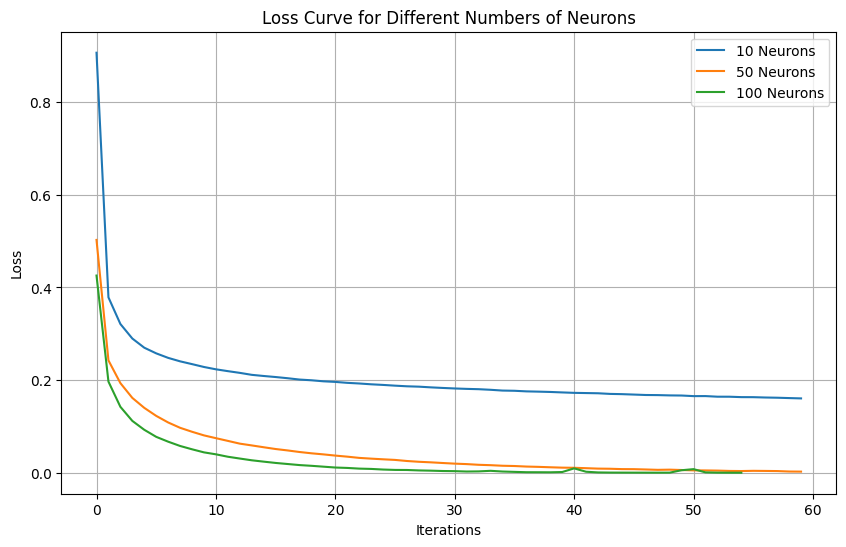

In [5]:
import matplotlib.pyplot as plt

# Define different numbers of neurons to test
neuron_counts = [10, 50, 100]

# Initialize a dictionary to store loss curves
neuron_loss_curves = {}

# Iterate through the list of neuron counts
for neurons in neuron_counts:
    print(f"\nTraining with {neurons} neurons in the hidden layer")
    # Instantiate MLPClassifier with the current neuron count
    mlp = skl_nn.MLPClassifier(hidden_layer_sizes=(neurons,), max_iter=60, verbose=True, random_state=1, learning_rate_init=0.001)
    # Train the model
    mlp.fit(X_train, y_train)
    # Store the loss curve
    neuron_loss_curves[neurons] = mlp.loss_curve_

# Create a figure for plotting
plt.figure(figsize=(10, 6))

# Plot each loss curve
for neurons, loss_curve in neuron_loss_curves.items():
    plt.plot(loss_curve, label=f'{neurons} Neurons')

# Add labels and title
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve for Different Numbers of Neurons")
plt.legend()
plt.grid(True)
plt.show()

## Summarize findings

### Subtask:
Present the observations and conclusions drawn from the analysis of the plots.


**Reasoning**:
Analyze the previously generated plots and the corresponding loss curves to describe the relationship between learning rate and loss, and the number of neurons and loss, and then synthesize the findings.



In [6]:
print("Analysis of Learning Rate and Loss:")
print("The plot shows that the learning rate significantly impacts the convergence of the MLP model.")
print("- A learning rate of 0.001 results in a smooth and steady decrease in loss, achieving the lowest final loss within the given iterations. This indicates that a smaller learning rate allows the model to converge more effectively.")
print("- A learning rate of 0.01 also shows a decreasing loss, but with more oscillations and a slightly higher final loss compared to 0.001. It converged earlier, likely due to the convergence criteria based on the change in loss.")
print("- A learning rate of 0.1 leads to highly unstable training, with the loss fluctuating significantly and not converging effectively within the 60 iterations. This suggests that a learning rate of 0.1 is too high, potentially causing the optimization to overshoot the minimum.")
print("Based on the plot, a learning rate of 0.001 appears most suitable among the tested values for this model and dataset, as it leads to stable training and the lowest loss.")

print("\nAnalysis of Number of Neurons and Loss:")
print("The plot illustrates the impact of the number of neurons in the hidden layer on the training loss.")
print("- The model with 10 neurons shows a relatively slow decrease in loss and reaches a higher final loss compared to models with more neurons.")
print("- Models with 50 and 100 neurons demonstrate faster convergence and achieve significantly lower training loss within the 60 iterations. This indicates that increasing the number of neurons allows the model to learn the complex patterns in the data more effectively.")
print("- While models with more neurons achieve lower training loss, the ConvergenceWarning suggests that they might require more iterations to fully converge. There is a trade-off: more neurons can lead to lower training loss but may increase training time and potentially lead to overfitting if not managed properly.")

print("\nComprehensive Summary:")
print("The analysis reveals that both the learning rate and the number of neurons in the hidden layer are crucial hyperparameters for training an MLP model.")
print("A suitable learning rate (like 0.001 in this case) is essential for stable and effective convergence. A learning rate that is too high (like 0.1) can lead to unstable training and poor performance.")
print("Increasing the number of neurons in the hidden layer generally allows the model to achieve lower training loss, suggesting increased capacity to learn complex patterns. However, this comes with the potential need for more training iterations and the risk of overfitting, which should be considered during model selection and training.")
print("Optimizing both hyperparameters is necessary to achieve the best performance for a given task.")

Analysis of Learning Rate and Loss:
The plot shows that the learning rate significantly impacts the convergence of the MLP model.
- A learning rate of 0.001 results in a smooth and steady decrease in loss, achieving the lowest final loss within the given iterations. This indicates that a smaller learning rate allows the model to converge more effectively.
- A learning rate of 0.01 also shows a decreasing loss, but with more oscillations and a slightly higher final loss compared to 0.001. It converged earlier, likely due to the convergence criteria based on the change in loss.
- A learning rate of 0.1 leads to highly unstable training, with the loss fluctuating significantly and not converging effectively within the 60 iterations. This suggests that a learning rate of 0.1 is too high, potentially causing the optimization to overshoot the minimum.
Based on the plot, a learning rate of 0.001 appears most suitable among the tested values for this model and dataset, as it leads to stable tr

## Summary:

### Data Analysis Key Findings

*   A learning rate of 0.001 resulted in stable training and the lowest final loss among the tested values (0.001, 0.01, and 0.1).
*   A learning rate of 0.1 led to highly unstable training and failed to converge effectively within the given iterations.
*   Increasing the number of neurons in the hidden layer (from 10 to 50 and 100) generally led to faster convergence and lower training loss, indicating a greater capacity to learn complex patterns.
*   Models with more neurons (50 and 100) achieved significantly lower loss compared to the model with 10 neurons.

### Insights or Next Steps

*   The choice of learning rate significantly impacts model convergence and stability; a learning rate that is too high can prevent the model from converging.
*   Increasing the number of neurons can improve the model's ability to reduce training loss, but it might require more training iterations and could increase the risk of overfitting.
